# Loan Application Approval Prediction

##  1. Business Understanding

### Business Goals:
To minimize loss, bank need to be able to create approval decision to determine customers who will default if given loan, and who will keep paying.  An applicant’s demographic, socio-economic profiles, and past behaviors are considered by loan managers before a decision is taken regarding his/her loan application.

### Description of Data:
The Data contains 20 indepent variables / features, and the target variable (default): the classification whether an applicant is considered a Good or a Bad credit risk for 1000 loan applicants. Assume there are no additional information available on the data description. Feel free to make your own assumption on the data.

### Objective:
Create predictive model to guidance for making a decision whether to approve a loan to a prospective applicant based on his/her profiles.

### Data:

The data set includes information about:
- Application details: credit amount, credit duration, purpose.
- Applicant assets: checking account, saving Account, housing, property status.
- Applicant Credit status: credit amount, credit history, number of credit at this bank. 
- Applicant personal status: sex, age, telephone, foreigner status, employment status, income from installments, employment status, applicant dependents.


    default: 1 (Accepted) and 0 (Not Accepted)

    account_check_status : The status of applicant checking account (No checking account, < 0 DM, ...)

    duration_in_month: Applicant Loan Duration (in months)
    
    credit_history: The history of applicants credits (exixting credits, all credits paid back, ...)
    
    purpose: Intended use of loan (car, house, ...)
    
    Credit Amount: Amount of loan 
    
    savings: The status of applicants savings account (no savings account, < 100 DM, ...)
    
    present_emp_since: Duration of employment (less than 1 year, ...)
    
    installment_as_income_perc: Income from installment (in % of available income)
    
    personal_status_sex: Applicants gender and marriage status (female : divorced/separated/married, male : married, ...)
    
    other_debtors: have other debt status as co-applicant or guarantor 
    
    present_res_since: Applicants periods as residence (in years)
    
    property: Applicants equities (real estate, cars, none, ...)
    
    age: Applicants age 
    
    other_installments_plan: Applicants other plans for installments (bank, stores, ...)
    
    housing: applicants real estate belongings (own, rent, for free)
    
    credit_this_bank: Number of applicant existing credits at this bank 
    
    job: Applicants profession (skilled, unemployed, manager, ...)
    
    people_under_maintenance: Number of applicants dependents 
    
    telephone: Applicants telephone availability (yes or no)
    
    foreign_worker: Applicants foreigner status (foreigner or no)
    

## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

## 2. Data Understanding
## Import Data

In [2]:
df = pd.read_excel('Part 1. Modeling - Credit_Data.xls')

In [3]:
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
df.iloc[11]

default                                                                       1
account_check_status                                                     < 0 DM
duration_in_month                                                            48
credit_history                         existing credits paid back duly till now
purpose                                                                business
credit_amount                                                              4308
savings                                                            ... < 100 DM
present_emp_since                                                 ... < 1 year 
installment_as_income_perc                                                    3
personal_status_sex                         female : divorced/separated/married
other_debtors                                                              none
present_res_since                                                             4
property                      if not A12

In [5]:
df.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [7]:
temp=[]
for i in df.columns:
    temp.append([i,df[i].count(),df[i].nunique(),df[i].value_counts().sort_values(ascending=False).index[0],
                 df[i].value_counts()[df[i].value_counts().sort_values(ascending=False).index[0]]])
info_df = pd.DataFrame(temp, columns = ['dataFeatures','count','unique','top','freq'])
info_df = info_df.set_index('dataFeatures')
info_df

,count,unique,top,freq
dataFeatures,,,,
default,1000,2,0,700
account_check_status,1000,4,no checking account,394
duration_in_month,1000,33,24,184
credit_history,1000,5,existing credits paid back duly till now,530
purpose,1000,10,domestic appliances,280
credit_amount,1000,921,1258,3
savings,1000,5,... < 100 DM,603
present_emp_since,1000,5,1 <= ... < 4 years,339
installment_as_income_perc,1000,4,4,476


In [8]:
temp=[]
for i in df.columns:
    temp.append([i,str(df[i].dtype),df[i].isna().sum(),round(((df[i].isna().sum())/len(df[i]))*100,2),
                df[i].nunique(),df[i].drop_duplicates().sample(2).values])
info_df_2 = pd.DataFrame(temp, columns = ['dataFeatures','dataType','null','nullPct','unique','uniqueSample'])
info_df_2

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,default,int64,0,0.0,2,"[1, 0]"
1,account_check_status,object,0,0.0,4,"[no checking account, >= 200 DM / salary assig..."
2,duration_in_month,int64,0,0.0,33,"[6, 39]"
3,credit_history,object,0,0.0,5,"[delay in paying off in the past, no credits t..."
4,purpose,object,0,0.0,10,"[car (new), car (used)]"
5,credit_amount,int64,0,0.0,921,"[1289, 1795]"
6,savings,object,0,0.0,5,"[100 <= ... < 500 DM, unknown/ no savings acco..."
7,present_emp_since,object,0,0.0,5,"[... < 1 year , 4 <= ... < 7 years]"
8,installment_as_income_perc,int64,0,0.0,4,"[2, 4]"
9,personal_status_sex,object,0,0.0,4,"[female : divorced/separated/married, male : m..."


### Exploratory Data Analysis 

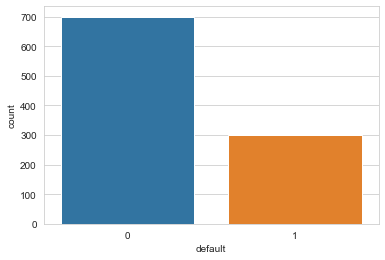

In [9]:
sns.countplot(data=df, x='default')

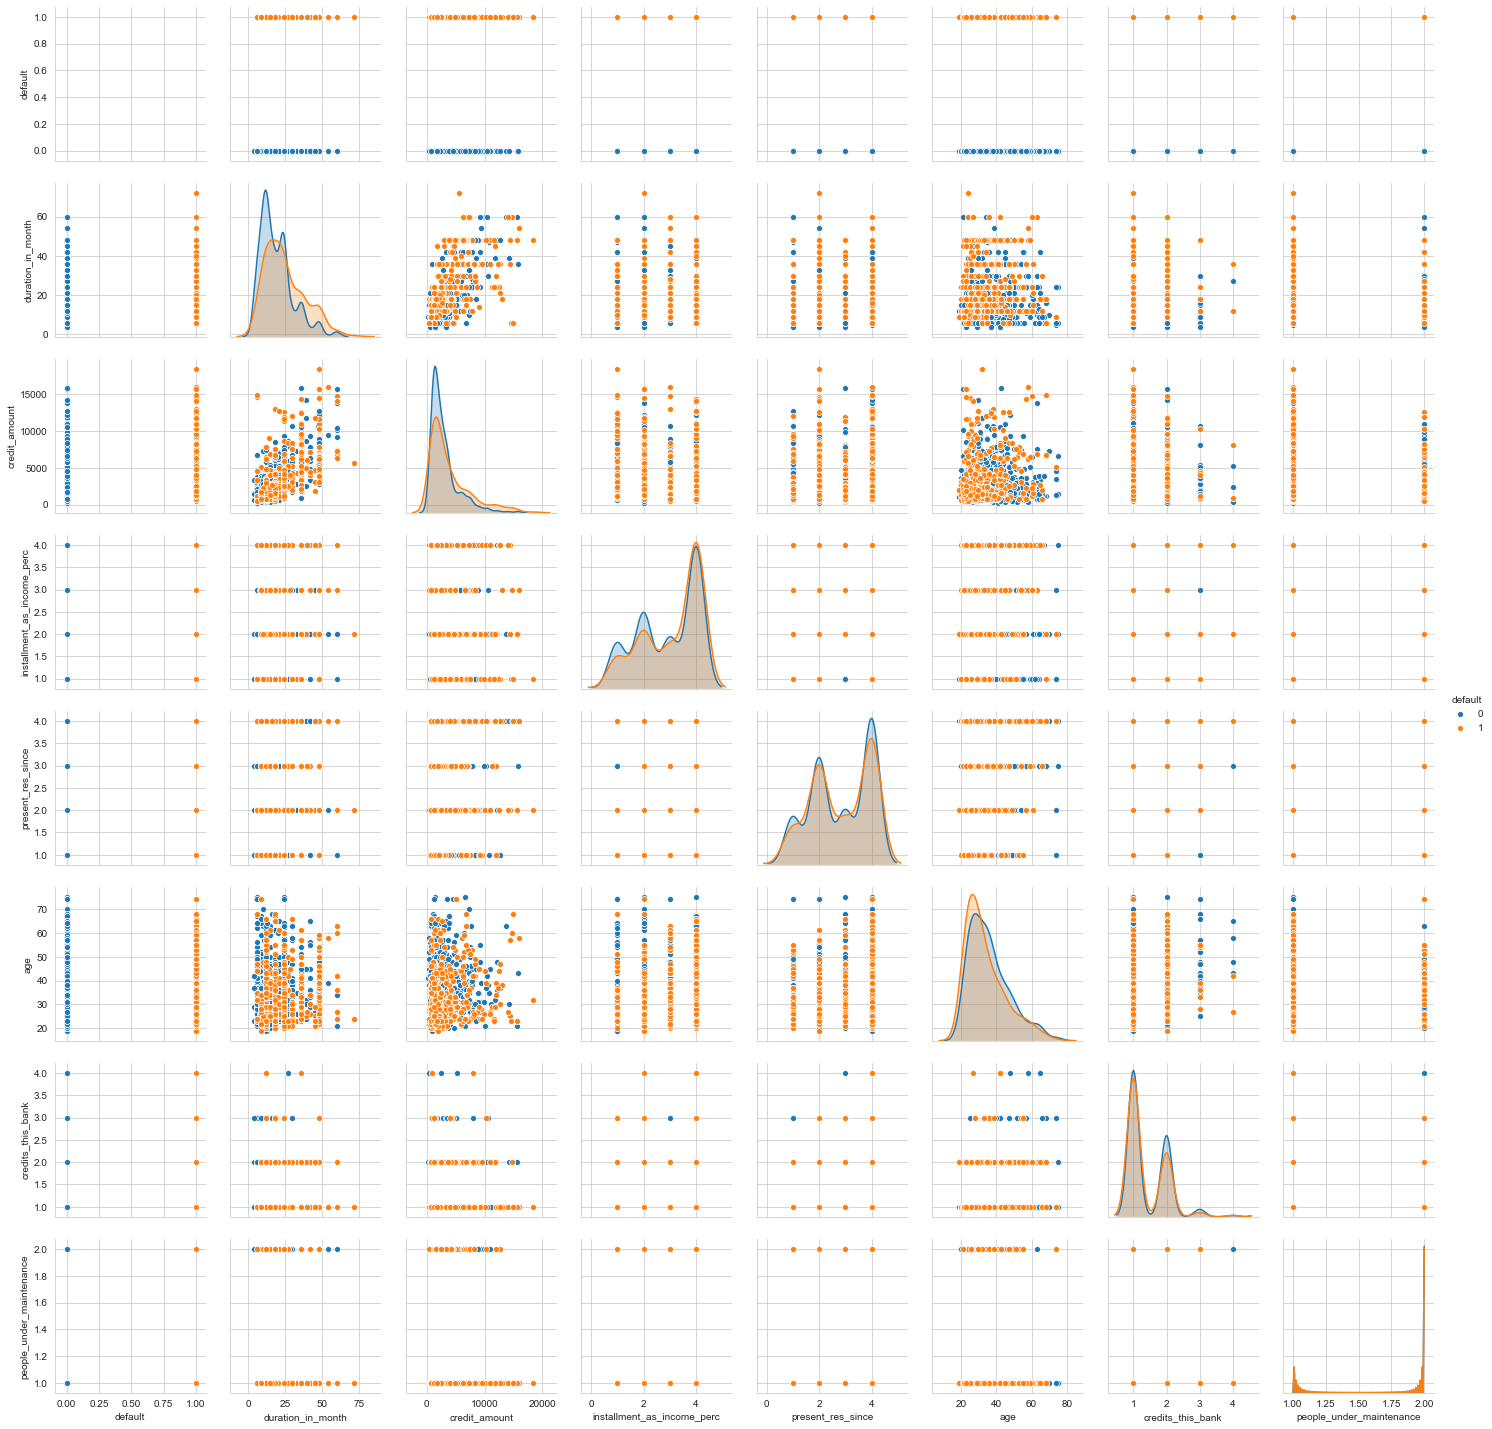

In [10]:
sns.pairplot(df,hue='default')

### Numerical Data

In [11]:
df.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


#### DURATION IN MONTH have a positive correlation, the longer the loan duration have higher probability of application acceptance

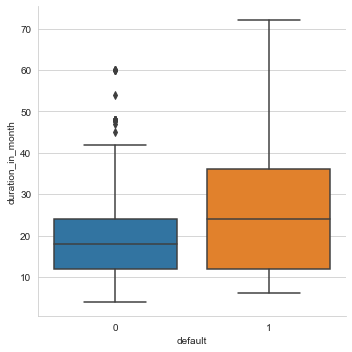

In [12]:
sns.catplot(x="default",y='duration_in_month', kind="box", data=df)

In [13]:
df.groupby('default').describe()['duration_in_month']

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,700.0,19.207143,11.079564,4.0,12.0,18.0,24.0,60.0
1,300.0,24.860000,13.282639,6.0,12.0,24.0,36.0,72.0


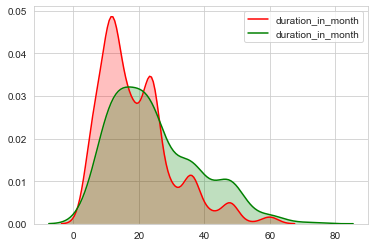

In [14]:
g = sns.kdeplot(df[(df['default']==0)]['duration_in_month'],color='red',shade=True)
g = sns.kdeplot(df[(df['default']==1)]['duration_in_month'],color='green',shade=True)

#### higher CREDIT AMOUNT, higher application acceptance rate

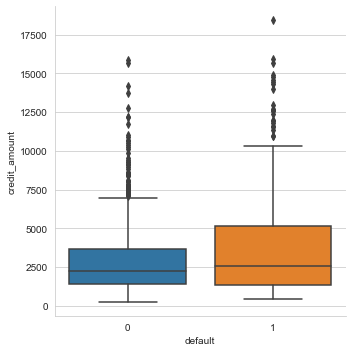

In [15]:
sns.catplot(x="default",y='credit_amount', kind="box", data=df)

In [16]:
df.groupby('default').describe()['credit_amount']

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,700.0,2985.457143,2401.472278,250.0,1375.5,2244.0,3634.75,15857.0
1,300.0,3938.126667,3535.818955,433.0,1352.5,2574.5,5141.50,18424.0


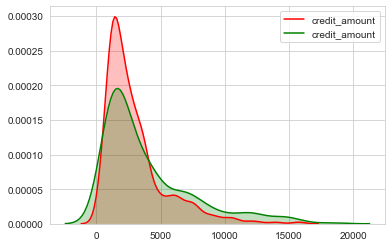

In [17]:
g = sns.kdeplot(df[(df['default']==0)]['credit_amount'],color='red',shade=True)
g = sns.kdeplot(df[(df['default']==1)]['credit_amount'],color='green',shade=True)

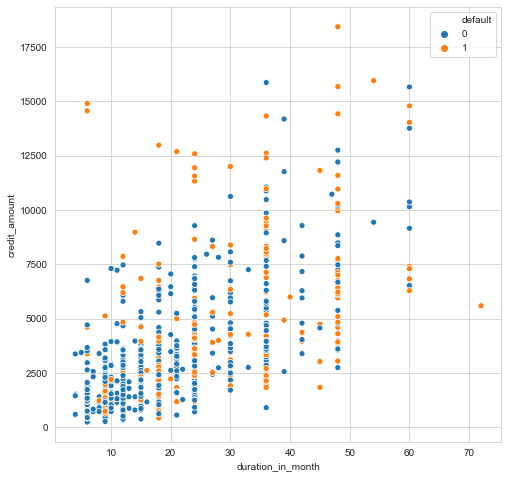

In [18]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='duration_in_month', y='credit_amount', hue='default')

Positive correlation between duration and credit amount, the higher duration and credit amount the higher chance the application will be accepted.

#### INSTALLMENT AS INCOME

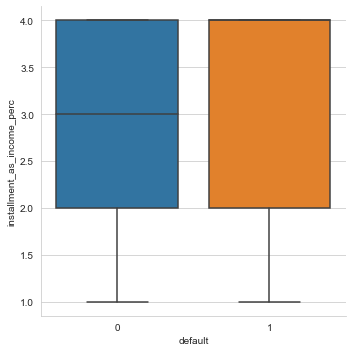

In [19]:
sns.catplot(x="default",y='installment_as_income_perc', kind="box", data=df)

In [20]:
df.groupby('default').describe()['installment_as_income_perc']

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,700.0,2.920000,1.128078,1.0,2.0,3.0,4.0,4.0
1,300.0,3.096667,1.088395,1.0,2.0,4.0,4.0,4.0


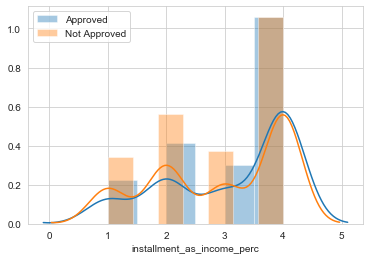

In [21]:
sns.distplot(df[df['default']==1]['installment_as_income_perc'], label='Approved')
sns.distplot(df[df['default']==0]['installment_as_income_perc'], label='Not Approved')
plt.legend()

Higher acceptance rate in higher percentage installment as income, for example for 3% and 4% as seen at the graph above

#### Present Residence Period,

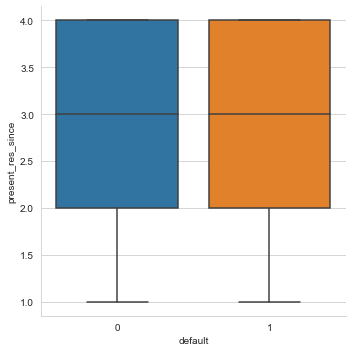

In [22]:
sns.catplot(x="default",y='present_res_since', kind="box", data=df)

In [23]:
df.groupby('default').describe()['present_res_since']

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,700.0,2.842857,1.108373,1.0,2.0,3.0,4.0,4.0
1,300.0,2.850000,1.094605,1.0,2.0,3.0,4.0,4.0


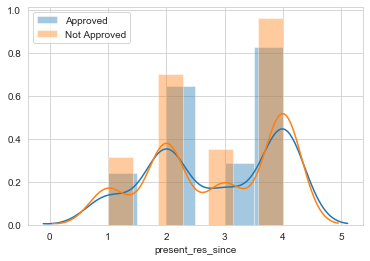

In [24]:
sns.distplot(df[df['default']==1]['present_res_since'], label='Approved')
sns.distplot(df[df['default']==0]['present_res_since'], label='Not Approved')
plt.legend()

#### AGE,

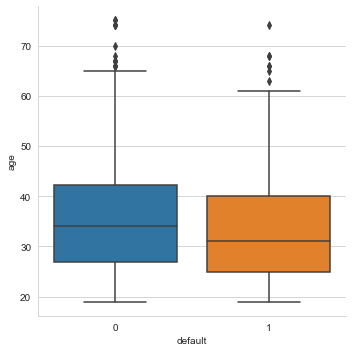

In [25]:
sns.catplot(x="default",y='age', kind="box", data=df)

In [26]:
df.groupby('default').describe()['age']

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,700.0,36.224286,11.381145,19.0,27.0,34.0,42.25,75.0
1,300.0,33.963333,11.222379,19.0,25.0,31.0,40.00,74.0


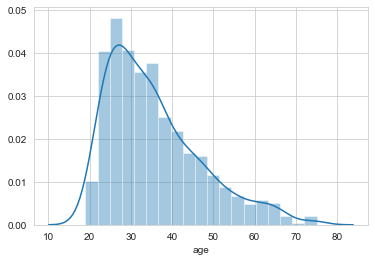

In [27]:
sns.distplot(df['age'])

In [28]:
df.describe()['age']

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

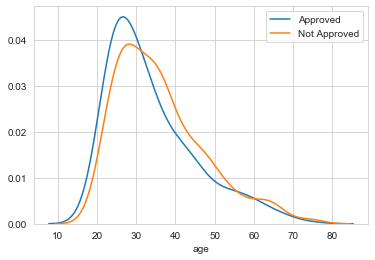

In [29]:
sns.distplot(df[df['default']==1]['age'], label='Approved',hist=False)
sns.distplot(df[df['default']==0]['age'], label='Not Approved',hist=False)
plt.legend()

In this sample data the mean age for applications approved is smaller than the mean age of the not approved applications.

#### CREDIT THIS BANK

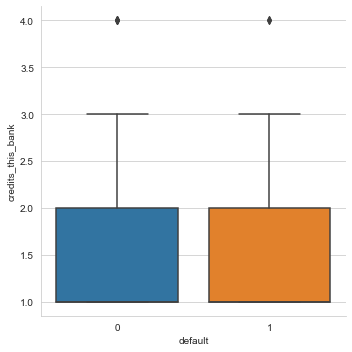

In [30]:
sns.catplot(x="default",y='credits_this_bank', kind="box", data=df)

In [31]:
df.groupby('default').describe()['credits_this_bank']

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,700.0,1.424286,0.584721,1.0,1.0,1.0,2.0,4.0
1,300.0,1.366667,0.559702,1.0,1.0,1.0,2.0,4.0


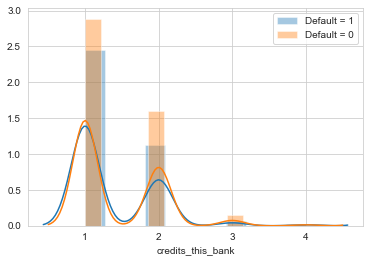

In [32]:
sns.distplot(df[df['default']==1]['credits_this_bank'], label='Default = 1')
sns.distplot(df[df['default']==0]['credits_this_bank'], label='Default = 0')
plt.legend()

Lower the number of ongoing credit, the higher acceptance rate

#### People under maintenance,

In [33]:
df.groupby('default').describe()['people_under_maintenance']

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,700.0,1.155714,0.362844,1.0,1.0,1.0,1.0,2.0
1,300.0,1.153333,0.360911,1.0,1.0,1.0,1.0,2.0


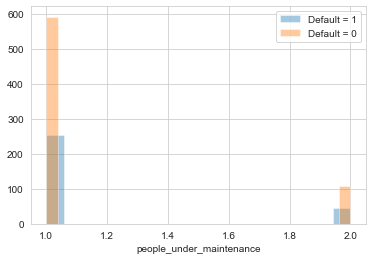

In [34]:
sns.distplot(df[df['default']==1]['people_under_maintenance'], label='Default = 1',kde=False)
sns.distplot(df[df['default']==0]['people_under_maintenance'], label='Default = 0',kde=False)
plt.legend()

### Categorical Data

In [865]:
df.describe(include=[np.object])

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,no checking account,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,male : single,none,"if not A121/A122 : car or other, not in attrib...",none,own,skilled employee / official,none,yes
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


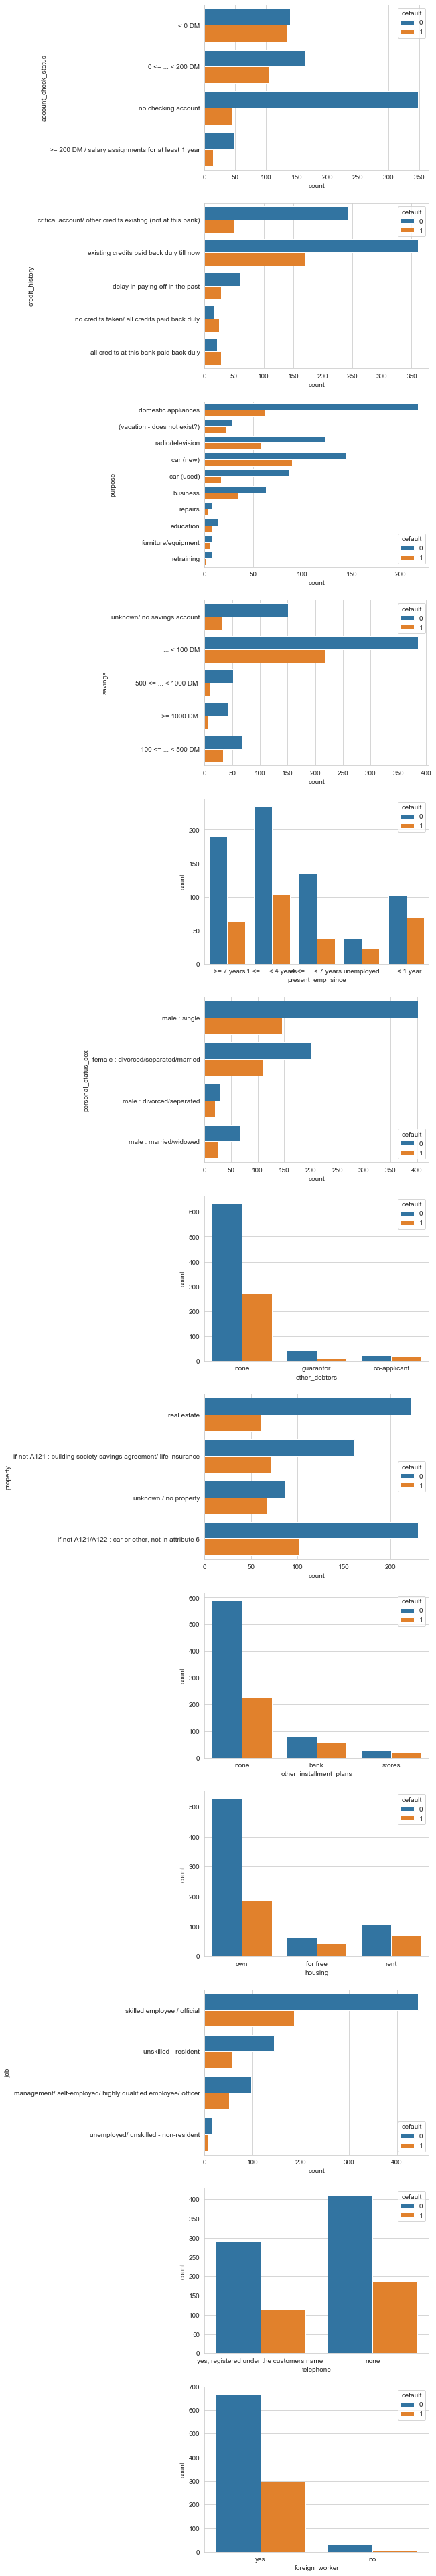

In [871]:
fig, axs = plt.subplots(13,figsize=(6,70))
sns.countplot(data=df, y='account_check_status', hue='default', ax=axs[0])
sns.countplot(data=df, y='credit_history', hue='default', ax=axs[1])
sns.countplot(data=df, y='purpose', hue='default', ax=axs[2])
sns.countplot(data=df, y='savings', hue='default', ax=axs[3])
sns.countplot(data=df, x='present_emp_since', hue='default', ax=axs[4])
sns.countplot(data=df, y='personal_status_sex', hue='default', ax=axs[5])
sns.countplot(data=df, x='other_debtors', hue='default', ax=axs[6])
sns.countplot(data=df, y='property', hue='default', ax=axs[7])
sns.countplot(data=df, x='other_installment_plans', hue='default', ax=axs[8])
sns.countplot(data=df, x='housing', hue='default', ax=axs[9])
sns.countplot(data=df, y='job', hue='default', ax=axs[10])
sns.countplot(data=df, x='telephone', hue='default', ax=axs[11])
sns.countplot(data=df, x='foreign_worker', hue='default', ax=axs[12])

#### Applicant Checking Account Status

[Text(0, 0, '< 0 DM'),
 Text(0, 0, '0 <= ... < 200 DM'),
 Text(0, 0, 'no checking account'),
 Text(0, 0, '>= 200 DM / salary assignments for at least 1 year')]

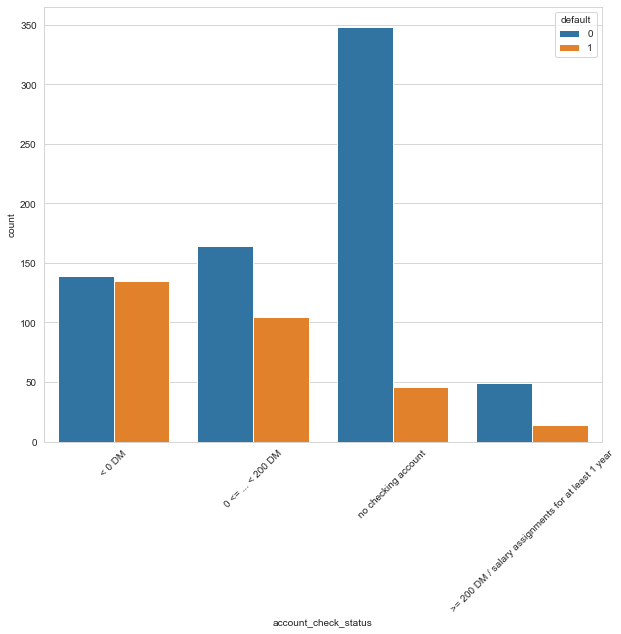

In [909]:
plt.figure(figsize=(10,8))
chart = sns.countplot(data=df,x='account_check_status',hue='default')
chart.set_xticklabels(df['account_check_status'].unique(),rotation=45)

Applicants with no checking account have a high probability of application rejection

#### Applicants Credit History

[Text(0, 0, 'critical account/ other credits existing (not at this bank)'),
 Text(0, 0, 'existing credits paid back duly till now'),
 Text(0, 0, 'delay in paying off in the past'),
 Text(0, 0, 'no credits taken/ all credits paid back duly'),
 Text(0, 0, 'all credits at this bank paid back duly')]

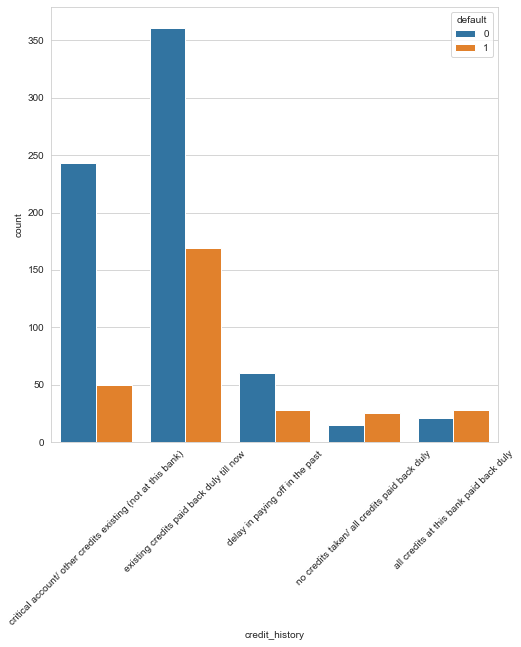

In [1658]:
plt.figure(figsize=(8,8))
chart = sns.countplot(data=df,x='credit_history',hue='default')
chart.set_xticklabels(df['credit_history'].unique(),rotation=45)

Applicants with credit history of critical account status have a high prob of application rejection, vice versa if the applicants have good credit history (all credits are paid back) have a high prob of application approval.

#### Purpose

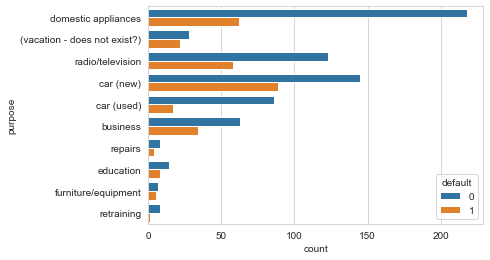

In [46]:
sns.countplot(data=df, y='purpose', hue='default')

Based on this sampling data the loan intension for used car have a high rate of application rejection. 

## 3. Data Preparation

## Standardizing the Scale

[Text(0, 0, 'duration_in_month'),
 Text(0, 0, 'credit_amount'),
 Text(0, 0, 'installment_as_income_perc'),
 Text(0, 0, 'age'),
 Text(0, 0, 'present_res_since'),
 Text(0, 0, 'credits_this_bank'),
 Text(0, 0, 'people_under_maintenance')]

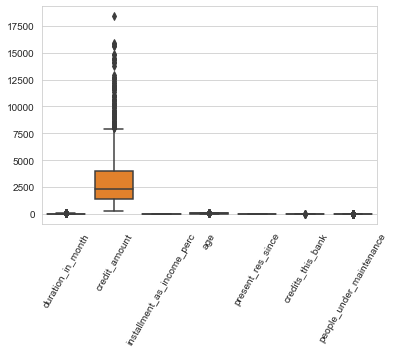

In [912]:
chart = sns.boxplot(data=df[['duration_in_month','credit_amount','installment_as_income_perc','age','present_res_since',
                    'credits_this_bank','people_under_maintenance']])
chart.set_xticklabels(df[['duration_in_month','credit_amount','installment_as_income_perc','age','present_res_since',
                    'credits_this_bank','people_under_maintenance']],rotation=60)

Because the credit amount have a large scale then other, Scaler need to be applied

In [913]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [914]:
standard_scaler = StandardScaler()

In [915]:
df_std = df.copy()

In [916]:
for i in ['duration_in_month','credit_amount','installment_as_income_perc','age','present_res_since',
                    'credits_this_bank','people_under_maintenance']:
    df_std[i] = pd.DataFrame(standard_scaler.fit_transform(df[[i]]))[0]

[Text(0, 0, 'duration_in_month'),
 Text(0, 0, 'credit_amount'),
 Text(0, 0, 'installment_as_income_perc'),
 Text(0, 0, 'age'),
 Text(0, 0, 'present_res_since'),
 Text(0, 0, 'credits_this_bank'),
 Text(0, 0, 'people_under_maintenance')]

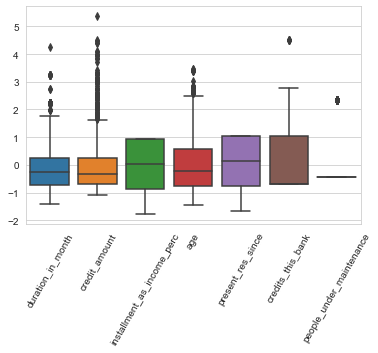

In [917]:
chart = sns.boxplot(data=df_std[['duration_in_month','credit_amount','installment_as_income_perc','age','present_res_since',
                    'credits_this_bank','people_under_maintenance']])
chart.set_xticklabels(df_std[['duration_in_month','credit_amount','installment_as_income_perc','age','present_res_since',
                    'credits_this_bank','people_under_maintenance']],rotation=60)

The scales are now the same for each numerical variables.

## Encode Categorical Features

Encoding the catgorical features using pandas get dummies. 

In [918]:
df_convert = pd.get_dummies(data=df_std, drop_first=True, columns=['account_check_status', 'credit_history', 'purpose', 'savings',
                                                              'present_emp_since', 'personal_status_sex','other_debtors',
                                                                'property','other_installment_plans','housing','job',
                                                              'telephone','foreign_worker'])

In [919]:
df_convert.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1,0,...,0,1,0,1,0,1,0,0,1,1
1,1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0,0,...,0,1,0,1,0,1,0,0,0,1
2,0,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,0,0,...,0,1,0,1,0,0,0,1,0,1
3,0,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,1,0,...,1,1,0,0,0,1,0,0,0,1


## Train test split

Check the best split size for the train test split. 

[0.77022222 0.7658363  0.75688889 0.75743329 0.75188889]
[450 562 675 787 900]


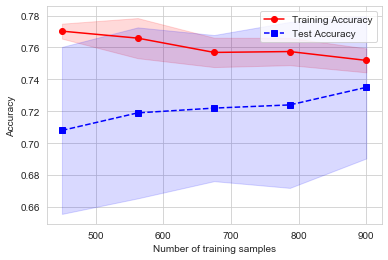

In [920]:
from sklearn.model_selection import learning_curve

data=df_convert.drop('default',axis=1)
target=df_convert['default']
train_sizes, train_scores, test_scores = learning_curve(estimator=logmodel,
                                                       X=data,
                                                       y=target,
                                                       train_sizes=np.linspace(0.5, 1.0, 5),
                                                       cv=10)

# print('train_scores:\n')
# print(train_scores)
# print('test_scores:\n')
# print(test_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
print(train_sizes)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

training sample of 90% will give the best score, train test split the data with test size 0.1 which is 90% train data and 10% training data

In [1616]:
from sklearn.model_selection import train_test_split

In [1617]:
X_train, X_test, y_train, y_test = train_test_split(df_convert.drop('default',axis=1), 
                                                    df_convert['default'], test_size=0.1)

## SMOTE Oversampling

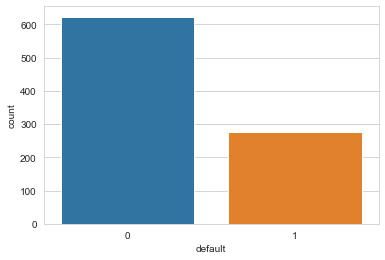

In [1618]:
sns.countplot(y_train)

Unbalanced classes in the training data might lead to problems, because classification algorithms go for the majority rule. Using Synthetic Minority Over-sampling TEchnique.

In [1619]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
oversampled_trainX, oversampled_trainY = sm.fit_sample(X_train, y_train)

In [1620]:
oversampled_trainX = pd.DataFrame(oversampled_trainX, columns=X_train.columns)

In [1621]:
oversampled_trainX.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,-0.240857,-0.617177,0.024147,-0.765977,-0.311879,1.027079,-0.428290,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.738668,-0.452361,0.918477,-1.672459,-0.751642,-0.704926,-0.428290,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.588827,0.260424,0.024147,-0.765977,0.831502,-0.704926,-0.428290,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.738668,-0.819919,-0.870183,0.140505,1.007407,1.027079,2.334869,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.738668,-0.608316,0.918477,1.046987,1.711027,1.027079,2.334869,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


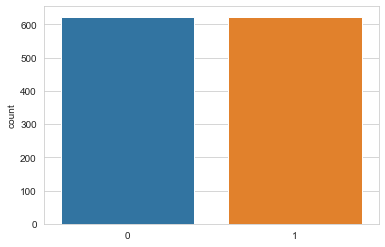

In [1622]:
sns.countplot(oversampled_trainY)

The data is now balanced after using SMOTE oversampling

## 4. Modelling using Logistic Regression

In [1623]:
from sklearn.linear_model import LogisticRegression

In [1624]:
logmodel = LogisticRegression(class_weight='balanced',C= 0.093, max_iter= 100, penalty= 'l2',solver='lbfgs')
logmodel.fit(oversampled_trainX,oversampled_trainY)

LogisticRegression(C=0.093, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1625]:
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [1626]:
PredictProb = logmodel.predict_proba(X_test)
PredictProb[:,1]

array([0.12956085, 0.16800252, 0.92087894, 0.16044836, 0.64335539,
       0.35422765, 0.08578919, 0.76943026, 0.6224427 , 0.42239233,
       0.12423796, 0.78904447, 0.26016176, 0.1485763 , 0.52586575,
       0.05134174, 0.44240863, 0.30439707, 0.36247992, 0.66559127,
       0.70850078, 0.77831049, 0.31477783, 0.23718816, 0.07431625,
       0.54214468, 0.14937847, 0.58656352, 0.03871754, 0.9302099 ,
       0.0836574 , 0.38316288, 0.10304726, 0.66230202, 0.80226108,
       0.83921531, 0.65794231, 0.23248524, 0.08835214, 0.65187415,
       0.92105508, 0.10333041, 0.61304901, 0.63677851, 0.52665485,
       0.54651809, 0.33589113, 0.77125175, 0.11780344, 0.42492547,
       0.14086287, 0.36247051, 0.24296145, 0.36483949, 0.47620853,
       0.72816795, 0.24475305, 0.17891034, 0.09752439, 0.59242054,
       0.75052052, 0.65301873, 0.07458229, 0.2264223 , 0.73659509,
       0.76170592, 0.70089765, 0.27611352, 0.25750089, 0.61302968,
       0.04561043, 0.42946746, 0.51998195, 0.41460228, 0.14520

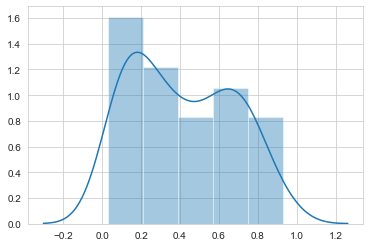

In [1627]:
sns.distplot(PredictProb[:,1])

## 5. Result Evaluation

In [1637]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss

In [1638]:
con = pd.DataFrame(data=confusion_matrix(y_test, predictions), columns=['P No', 'P Yes'], index = ['A No', 'A Yes'])
print(con)

       P No  P Yes
A No     55     22
A Yes     4     19


The results shows that the model can increased the applications processing time by 227% by decreasing the application need to be checked from 100 to 41.

There are 4 data in the False Negative state, that means the model have a loss about 10%

In [1640]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81        77
           1       0.46      0.83      0.59        23

    accuracy                           0.74       100
   macro avg       0.70      0.77      0.70       100
weighted avg       0.82      0.74      0.76       100



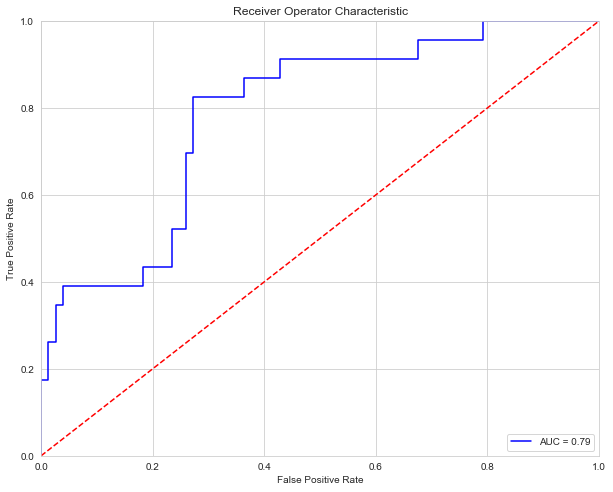

In [1641]:
preds = PredictProb[:,1]
fpr, tpr, treshhold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1646]:
import statsmodels.api as sm
logit_model = sm.Logit(oversampled_trainY,oversampled_trainX)
result = logit_model.fit(method='bfgs')
print(result.summary2())

         Current function value: 0.474749
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                                                      Results: Logit
Model:                                 Logit                               Pseudo R-squared:                    0.315     
Dependent Variable:                    y                                   AIC:                                 1279.0742 
Date:                                  2020-01-07 10:13                    BIC:                                 1525.2034 
No. Observations:                      1246                                Log-Likelihood:                      -591.54   
Df Model:                              47                                  LL-Null:                             -863.66   
Df Residuals:                          1198                                LLR p-value:                         8.0953e-86
Converged:                             0.0000              

In [1647]:
p_values = result.summary2().tables[1]['P>|z|']

In [1648]:
summary_values = pd.DataFrame(p_values)

In [1649]:
summary_values['coef'] = result.summary2().tables[1]['Coef.']

In [1650]:
summary_values.sort_values(by=['P>|z|'],ascending=True)

,P>|z|,coef
account_check_status_no checking account,2.301828e-14,-1.586928
installment_as_income_perc,4.355345e-09,0.523008
personal_status_sex_male : single,9.442988e-06,-0.842057
purpose_car (used),3.606069e-05,-1.723244
foreign_worker_yes,6.559689e-05,2.106572
credit_amount,1.660816e-04,0.425709
credit_history_critical account/ other credits existing (not at this bank),4.514576e-04,-1.355127
property_real estate,3.910701e-03,-0.656115
present_emp_since_4 <= ... < 7 years,7.778062e-03,-0.716524
age,9.664570e-03,-0.242301


In [1666]:
summary_values = summary_values.reset_index()

In [1668]:
summary_values['P-Value'] = 1-summary_values['P>|z|']

In [1671]:
summary_values.sort_values(by='P-Value',ascending=False, inplace=True)

In [1677]:
summary_values.sort_values(by='P>|z|',inplace=True)

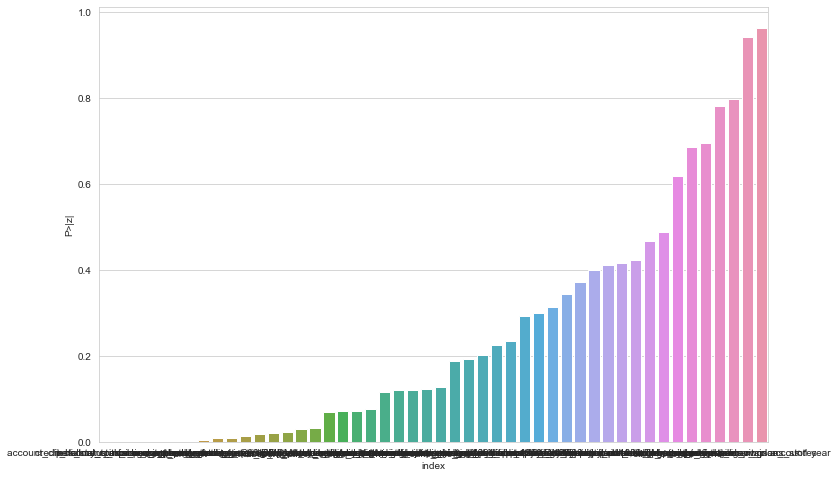

In [1680]:
plt.figure(figsize=(12,8))
sns.barplot(data=summary_values, y='P>|z|', x='index')

In [1659]:
summary_values.sort_values(by=['P>|z|'],ascending=True).head(10)

,P>|z|,coef
account_check_status_no checking account,2.301828e-14,-1.586928
installment_as_income_perc,4.355345e-09,0.523008
personal_status_sex_male : single,9.442988e-06,-0.842057
purpose_car (used),3.606069e-05,-1.723244
foreign_worker_yes,6.559689e-05,2.106572
credit_amount,1.660816e-04,0.425709
credit_history_critical account/ other credits existing (not at this bank),4.514576e-04,-1.355127
property_real estate,3.910701e-03,-0.656115
present_emp_since_4 <= ... < 7 years,7.778062e-03,-0.716524
age,9.664570e-03,-0.242301


In [1651]:
summary_values.sort_values(by='coef',ascending=False).head(10)

,P>|z|,coef
foreign_worker_yes,6.559689e-05,2.106572
savings_... < 100 DM,1.337833e-02,1.019995
housing_rent,1.202803e-01,0.615848
credit_history_no credits taken/ all credits paid back duly,2.992056e-01,0.567553
savings_100 <= ... < 500 DM,2.259134e-01,0.560723
installment_as_income_perc,4.355345e-09,0.523008
savings_500 <= ... < 1000 DM,4.010776e-01,0.444530
account_check_status_< 0 DM,3.279214e-02,0.430226
credit_amount,1.660816e-04,0.425709
purpose_car (new),3.141919e-01,0.334431


In [1652]:
summary_values.sort_values(by='coef',ascending=True).head(10)

,P>|z|,coef
purpose_car (used),3.606069e-05,-1.723244
account_check_status_no checking account,2.301828e-14,-1.586928
credit_history_critical account/ other credits existing (not at this bank),4.514576e-04,-1.355127
other_debtors_guarantor,7.193471e-02,-0.944106
personal_status_sex_male : single,9.442988e-06,-0.842057
account_check_status_>= 200 DM / salary assignments for at least 1 year,2.186048e-02,-0.783367
present_emp_since_4 <= ... < 7 years,7.778062e-03,-0.716524
purpose_furniture/equipment,3.440882e-01,-0.699652
property_real estate,3.910701e-03,-0.656115
credit_history_delay in paying off in the past,1.218428e-01,-0.647420


Top 5 Most Significant Features:
1. Checking Account Status
2. Credit History
3. Credit amount
4. Personal Status
5. Installment as Income

Top 3 Most Positive Correlation:
1. Savings account checked
2. All credits paid fully
3. High installment as income

Top 3 Most Negative Correlation:
1. No Checking Account
2. Critical Credit History
3. Have another debt

## Logistic Regression Hyperparameter Tuning using GridSearchCV

In [1228]:
from sklearn.model_selection import GridSearchCV

In [1535]:
search = GridSearchCV(estimator = logmodel,
                      param_grid = {
                          'penalty': ['l2'],
                          'C': np.linspace(0.001,1,1000),
                          'max_iter' : [100],
                          'solver': ['lbfgs'],
                          'class_weight' : ['balanced']
                      }, scoring = 'accuracy',
                      cv = 5,
                      n_jobs = -1)

In [1536]:
search.fit(oversampled_trainX,oversampled_trainY)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=0.1, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([0.00...
       0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971, 0.972,
       0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 , 0.981,
       0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989, 0.99 ,
       0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999,
       1.   ]

In [1537]:
print(search.best_params_)
print(search.best_score_)

{'C': 0.093, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.7440758293838863


Using Gridseach Cross Validation to get the best hyperparameter for the model, the result stated above.

In [1538]:
print(classification_report(y_test, search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        67
           1       0.60      0.76      0.67        33

    accuracy                           0.75       100
   macro avg       0.73      0.75      0.73       100
weighted avg       0.77      0.75      0.76       100



## Model Evaluation

To test the stability of the model

In [946]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, log_loss, matthews_corrcoef

In [947]:
from sklearn.model_selection import KFold
K = 10
kf = KFold(n_splits = K, shuffle = True)

In [948]:
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average = 'macro')
    report = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    accuracy = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train, predictProba)
    return {
        'report' : report,
        'matthew' : matt,
        'f1' : f1,
        'roc' : roc_auc,
        'accuracy' : accuracy,
        'confusion' : confMatrix,
        'logloss' : logloss
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average = 'macro')
    report = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    accuracy = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test, predictProba)
    return {
        'report' : report,
        'matthew' : matt,
        'f1' : f1,
        'roc' : roc_auc,
        'accuracy' : accuracy,
        'confusion' : confMatrix,
        'logloss' : logloss
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [1644]:
train_errors = []
validation_errors =[]
data=df_convert.drop('default',axis=1)
target=df_convert['default']
for train_index, val_index, in kf.split(data, target):
    
    #split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #Oversampling
    sm = SMOTE(sampling_strategy='minority')
    X_train, y_train = sm.fit_sample(X_train, y_train)
    
    #instantiate model
    logmodel = LogisticRegression(class_weight='balanced',C= 0.093, max_iter= 100, penalty= 'l2',solver='lbfgs')
    
    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, logmodel)
    
    #append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [1645]:
matrix = []
for i, j in zip(train_errors, validation_errors):
    matrix.append([i['accuracy'], j['accuracy'], i['roc'], j['roc'],
                  i['f1'], j['f1'], i['matthew'], j['matthew'], i['logloss'], j['logloss']])
calc_matrix = pd.DataFrame(matrix, columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC',
                                             'Test ROC AUC', 'Train F1 Score', 'Test F1 Score', 'Train Matthews Corr Coef',
                                             'Test Matthews Corr Coef', 'Train Log Loss', 'Test Log Loss'])
average = []
for i in calc_matrix.columns:
    average.append(calc_matrix[i].mean())
average_mat = pd.DataFrame(average).transpose()
average_mat.columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC',
                                             'Test ROC AUC', 'Train F1 Score', 'Test F1 Score', 'Train Matthews Corr Coef',
                                             'Test Matthews Corr Coef', 'Train Log Loss', 'Test Log Loss']
index_label = []
for i in range(1, len(calc_matrix)+1):
    index_label.append(f'{i} Iteration')
index_label.append('Average')
calculation = pd.concat([calc_matrix, average_mat])
calculation.index = index_label
calculation

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
1 Iteration,0.770635,0.710,0.842842,0.799048,0.770513,0.679168,0.541844,0.371340,0.493411,0.532478
2 Iteration,0.764476,0.780,0.831422,0.826398,0.764209,0.770833,0.530153,0.542328,0.507606,0.518046
3 Iteration,0.775641,0.720,0.845751,0.786732,0.775410,0.666667,0.552418,0.359025,0.490141,0.531873
4 Iteration,0.762400,0.670,0.837443,0.753067,0.762034,0.634915,0.526420,0.325669,0.499907,0.604806
5 Iteration,0.790808,0.640,0.862189,0.640019,0.790674,0.604396,0.582366,0.217660,0.467146,0.689592
6 Iteration,0.762400,0.790,0.837002,0.836267,0.762254,0.752329,0.525447,0.529238,0.501107,0.482542
7 Iteration,0.759936,0.710,0.839486,0.769305,0.759863,0.687197,0.520191,0.410226,0.498017,0.562351
8 Iteration,0.768446,0.720,0.850427,0.791506,0.768290,0.702886,0.537614,0.406391,0.482600,0.523901
9 Iteration,0.757143,0.780,0.836228,0.810000,0.757093,0.751244,0.514496,0.509175,0.501179,0.509198
10 Iteration,0.769841,0.730,0.834611,0.834286,0.769609,0.712000,0.540774,0.460566,0.502740,0.516110


## 6. Model Deployment

In [1551]:
data=df_convert.drop('default',axis=1)
target=df_convert['default']

In [1552]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(class_weight='balanced',C= 0.093, max_iter= 100, penalty= 'l2',solver='lbfgs')
logmodel.fit(data,target)

LogisticRegression(C=0.093, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1553]:
import pickle
output = open('loan_prediction_model_2.pkl', 'wb')
pickle.dump(logmodel,output)
output.close()